In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [33]:
df = pd.read_csv('kyphosis.csv')

In [34]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


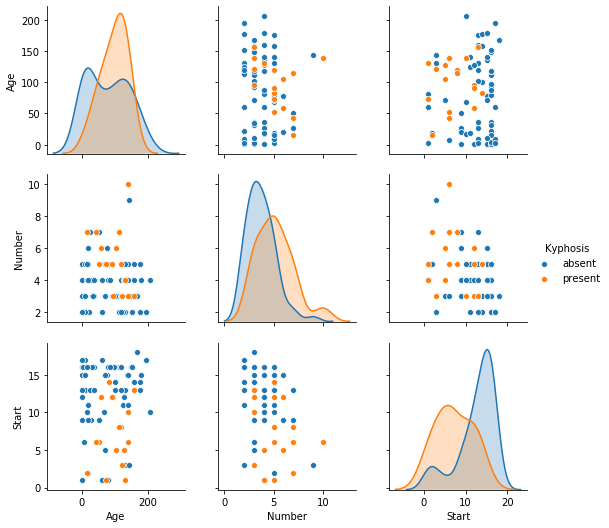

In [36]:
sns.pairplot(df,hue='Kyphosis')

In [37]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [39]:
dtree  = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[16  4]
 [ 6  1]]
              precision    recall  f1-score   support

      absent       0.73      0.80      0.76        20
     present       0.20      0.14      0.17         7

    accuracy                           0.63        27
   macro avg       0.46      0.47      0.46        27
weighted avg       0.59      0.63      0.61        27



In [47]:
rf  = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[18  2]
 [ 6  1]]
              precision    recall  f1-score   support

      absent       0.75      0.90      0.82        20
     present       0.33      0.14      0.20         7

    accuracy                           0.70        27
   macro avg       0.54      0.52      0.51        27
weighted avg       0.64      0.70      0.66        27



In [48]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [49]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

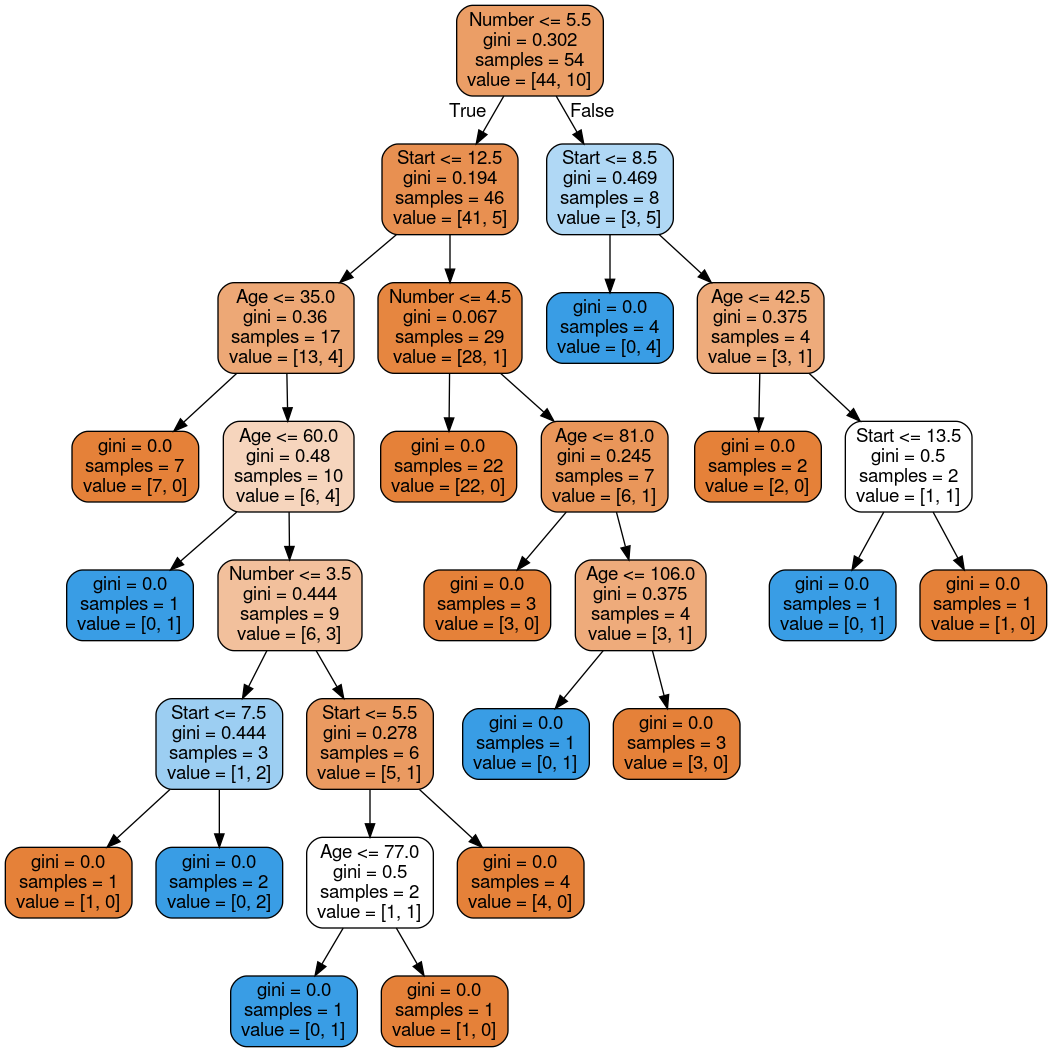

In [50]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  